In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df_train = pd.read_csv('DataSet.csv', sep=',', encoding='cp1251')
df_valid = pd.read_csv('validset.csv', sep=',', encoding='cp1251')
df_test = pd.read_csv('testset.csv', sep=',', encoding='cp1251')

In [3]:
df_train["combined_text"] = df_train["Исходные данные"] + " " + df_train["Референс"]
df_valid["combined_text"] = df_valid["Исходные данные"] + " " + df_valid["Референс"]
df_test["combined_text"] = df_test["Исходные данные"] + " " + df_test["Референс"]

In [4]:
df_train.head()

,Исходные данные,Референс,Классификатор,combined_text
0,субкультура 3E-36-EVJ6-5229 Технический,циркуль 3E-36-EVJ6-5229 Технический,1,субкультура 3E-36-EVJ6-5229 Технический циркул...
1,анализатор 4M-83-8M5A-1059 Конструктивный,анализатор 4M183-8M5A-1059 Конструктивный,0,анализатор 4M-83-8M5A-1059 Конструктивный анал...
2,краскопульт 7D-44-5R70-0204 Эргономический,краскопульт AP-73-M1Q0-1004 Эргономический,0,краскопульт 7D-44-5R70-0204 Эргономический кра...
3,идеализация 95-67-DQV8-2510 Радиочастотный,идеализация 92-67-DQV8-2510 Радиочастотный,0,идеализация 95-67-DQV8-2510 Радиочастотный иде...
4,аттестация 8V-17-MW40-1939 Конструктивный,турбулентность 8V-17-MW40-1939 Конструктивный,1,аттестация 8V-17-MW40-1939 Конструктивный турб...


In [5]:
df_valid.head()

,Исходные данные,Референс,Классификатор,combined_text
0,пульсометр 6A-05-JQ1Y-2382 Тепловой,пульсометр 32-78-MNET-2983 Тепловой,0,пульсометр 6A-05-JQ1Y-2382 Тепловой пульсометр...
1,сварка A2-01-KV5E-4645,сварка A2-01-KV5E-4645,1,сварка A2-01-KV5E-4645 сварка A2-01-KV5E-4645
2,рулетка V4-74-OKN7-4470,рулетка V4-74-OKN7-4470,1,рулетка V4-74-OKN7-4470 рулетка V4-74-OKN7-4470
3,энтузиазм E6-36-E440-9450,плоскогубцы E6-36-E440-9450,1,энтузиазм E6-36-E440-9450 плоскогубцы E6-36-E...
4,фонарь RV-27-KWRK-0881 Экологический,фонарь R9-96-DHP8-2730 Экологический,0,фонарь RV-27-KWRK-0881 Экологический фонарь R9...


In [6]:
df_test.head()

,Исходные данные,Референс,Классификатор,combined_text
0,нож VN-51-1T2Q-8388,нож 7J-08-YF1T-4967,0,нож VN-51-1T2Q-8388 нож 7J-08-YF1T-4967
1,аттестация KE-07-45RR-8755,аттестация KE-37-45RR-8755,0,аттестация KE-07-45RR-8755 аттестация KE-37-4...
2,уровень O8-31-3NK4-9760 Вибрационный,электросверло O8-31-3NK429760 Вибрационный,0,уровень O8-31-3NK4-9760 Вибрационный электросв...
3,уровень I6-85-FR5A-5029,уровень 6Z-51-9M0C-1851,0,уровень I6-85-FR5A-5029 уровень 6Z-51-9M0C-1851
4,темномер MD-53-SU57-4048,темномер KN-21-1H5X-2376,0,темномер MD-53-SU57-4048 темномер KN-21-1H5X-...


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()

def create_vocab(tokenizer, texts):    # Создание словаря для преобразования слов в числа
    tokenizer.fit_on_texts(texts)
    return len(tokenizer.word_index) + 1

def get_max_seq_length(tokenizer, texts):
    sequences = tokenizer.texts_to_sequences(texts)
    max_sequence_length = max(len(seq) for seq in sequences)
    return max_sequence_length, sequences

def pad_seq(sequences, max_sequence_length):
    return pad_sequences(sequences, maxlen=max_sequence_length)

def preprocess(tokenizer, texts):
    vocab_size = create_vocab(tokenizer, texts)
    max_sequence_length, sequences = get_max_seq_length(tokenizer, texts)
    return pad_seq(sequences, max_sequence_length), vocab_size, max_sequence_length

In [8]:
from sklearn.preprocessing import LabelEncoder
train, vocab_size, max_sequence_length = preprocess(tokenizer, np.array(df_train['combined_text']))
valid, vocab_size, max_sequence_length = preprocess(tokenizer, np.array(df_valid['combined_text']))
test, vocab_size, max_sequence_length = preprocess(tokenizer, np.array(df_test['combined_text']))

train_labels = np.array(df_train['Классификатор'])
valid_labels = np.array(df_valid['Классификатор'])
test_labels = np.array(df_test['Классификатор'])

In [9]:
max_sequence_length

12

In [10]:
vocab_size

149399

In [11]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SimpleRNN, Conv1D,GlobalAveragePooling1D, Dropout, MaxPooling1D
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Embedding(vocab_size, 6, input_length=max_sequence_length))
model.add(Conv1D(16, kernel_size=3, activation='relu',padding="same"))
model.add(Conv1D(16, kernel_size=3, activation='relu',padding="same"))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(32, kernel_size=3, activation='relu',padding="same"))
model.add(Conv1D(32, kernel_size=3, activation='relu',padding="same"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(64, kernel_size=3, activation='relu',padding="same"))
model.add(Conv1D(64, kernel_size=3, activation='relu',padding="same"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.6))

model.add(Conv1D(128, kernel_size=3, activation='relu',padding="same"))
model.add(Conv1D(128, kernel_size=3, activation='relu',padding="same"))
# model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.8))

model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 6)             896394    
                                                                 
 conv1d (Conv1D)             (None, 12, 16)            304       
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 16)            784       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 16)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 32)             1568      
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 32)             3104      
                                                        

In [12]:
import tensorflow as tf
Checkpoint = tf.keras.callbacks.ModelCheckpoint("saved_models/checkpoints/model-{epoch:02d}-{val_accuracy:.4f}.h5", save_best_only=True, monitor="val_accuracy", save_weights_only=True)
Best_Checkpoint = tf.keras.callbacks.ModelCheckpoint("saved_models/best_model.h5", save_best_only=True, save_weights_only=True, monitor="val_accuracy")

In [13]:
# Обучение модели
model.fit(train, train_labels, epochs=10, batch_size=20, validation_data=(valid, valid_labels), callbacks = [Checkpoint, Best_Checkpoint])

Epoch 1/10
5000/5000 [==============================] - 48s 9ms/step - loss: 0.6888 - accuracy: 0.5489 - val_loss: 0.6955 - val_accuracy: 0.4952
Epoch 2/10
5000/5000 [==============================] - 46s 9ms/step - loss: 0.5468 - accuracy: 0.7178 - val_loss: 0.3375 - val_accuracy: 0.8632
Epoch 3/10
5000/5000 [==============================] - 46s 9ms/step - loss: 0.2907 - accuracy: 0.8942 - val_loss: 0.2630 - val_accuracy: 0.9030
Epoch 4/10
5000/5000 [==============================] - 46s 9ms/step - loss: 0.1801 - accuracy: 0.9427 - val_loss: 0.2660 - val_accuracy: 0.9092
Epoch 5/10
5000/5000 [==============================] - 46s 9ms/step - loss: 0.1214 - accuracy: 0.9644 - val_loss: 0.2863 - val_accuracy: 0.9088
Epoch 6/10
5000/5000 [==============================] - 46s 9ms/step - loss: 0.0880 - accuracy: 0.9756 - val_loss: 0.2278 - val_accuracy: 0.9280
Epoch 7/10
5000/5000 [==============================] - 47s 9ms/step - loss: 0.0685 - accuracy: 0.9810 - val_loss: 0.3487 - val_ac

In [14]:
# model.save_weights('weights_full.h5')

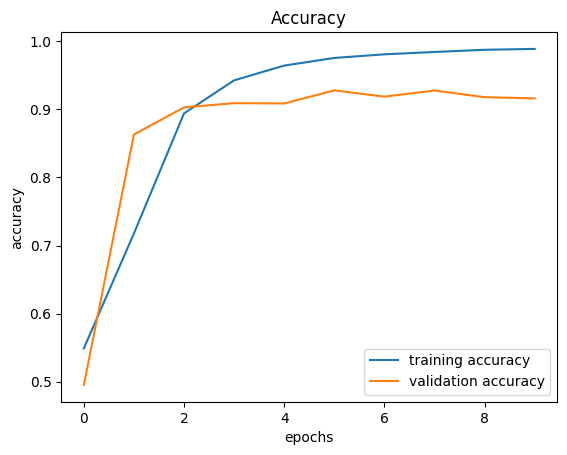

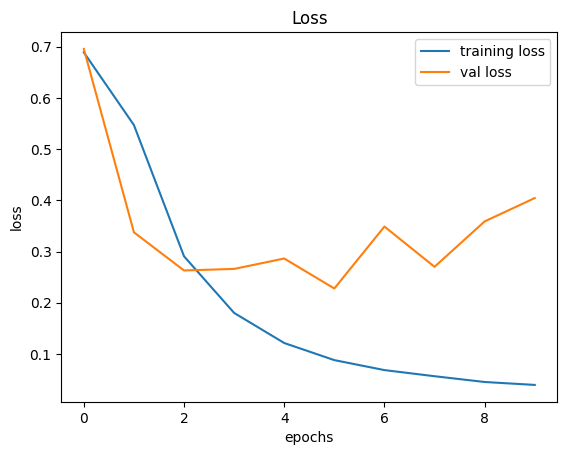

In [15]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.figure(1)
plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
from colorama import Fore
model.load_weights('saved_models/best_model.h5')
test_prediction = model.predict(test)

79/79 [==============================] - 0s 3ms/step


In [17]:
for text_1, text_2, pred_label, real_label in zip(df_test['Исходные данные'], df_test['Референс'], test_prediction, test_labels):
    print(Fore.RED if round(pred_label[0]) != real_label else Fore.GREEN , f'{text_1} - {text_2} - {round(pred_label[0])} - {real_label}')

 нож VN-51-1T2Q-8388  - нож 7J-08-YF1T-4967  - 0 - 0
 аттестация KE-07-45RR-8755  - аттестация KE-37-45RR-8755  - 0 - 0
 уровень O8-31-3NK4-9760 Вибрационный - электросверло O8-31-3NK429760 Вибрационный - 0 - 0
 уровень I6-85-FR5A-5029  - уровень 6Z-51-9M0C-1851  - 0 - 0
 темномер MD-53-SU57-4048  - темномер KN-21-1H5X-2376  - 0 - 0
 антенна EE-41-I9VW-8386  - антенна EE-41-I9VW-8386  - 1 - 1
 последовательность 10-35-C1O2-2148  - последовательность OO-85-GQT7-8382  - 0 - 0
 уровень CC-66-6SF0-2272 Биотехнологический - уровень CC-6616SF0-2272 Биотехнологический - 0 - 0
 пассатижи 4L-93-Z8PS-2950 Метрологический - аналитика 4L-93-Z8PS-2950 Метрологический - 1 - 1
 рельс 8F-46-UEJG-9992  - амортизация 8F-46-UEJG-9992  - 1 - 1
 гирокомпас 7E-04-XUMQ-1416 Химический - гирокомпас 7E-04-XUMQ11416 Химический - 0 - 0
 якорь YV-65-H1FF-9389  - якорь W7-74-PH22-1465  - 0 - 0
 компрессор MI-99-86VR-3770  - спарка MI-99-86VR-3770  - 1 - 1
 имитация BO-78-2Y3R-2812  - диспергирование S8-65-S6EL-538

In [18]:
from sklearn.metrics import accuracy_score
test_pred = np.array([round(pred[0]) for pred in test_prediction])
accuracy_score(test_pred, test_labels)

0.9296

In [19]:
for text_1, text_2, pred_label, real_label in zip(df_test['Исходные данные'], df_test['Референс'], test_prediction, test_labels):
    if round(pred_label[0]) != real_label: print(Fore.RED, f'{text_1} - {text_2} - {round(pred_label[0])} - {real_label}')

 структурирование 6I-12-C21G-3082  - структурирование ED-46-LB9Z-9262  - 1 - 0
 тара 6U-90-600P-1245  - тара 1U-90-600P-1245  - 1 - 0
 оружие H6-31-2HQ1-3410  - оружие H6-71-2HQ1-3410  - 1 - 0
 гидрамеханика ZI-09-Z9GD-7359 Гравитационный - гидрамеханика ZI-09-Z9GD-7389 Гравитационный - 1 - 0
 датчик 7F-79-QDQD-4572  - датчик 7F-79-QD5D-4572  - 1 - 0
 рычаг YB-36-7FMK-4678 Акустический - олово YB-36-7FMK-4678 Акустический - 0 - 1
 якорь 45-44-BXRL-9949  - якорь KS-59-O5QG-3868  - 1 - 0
 ключ WP-49-XBE3-4068  - ключ WP-49-7BE3-4068  - 1 - 0
 циркуль GB-74-0RPX-8073  - клещ 0B-74-0RPX-8073  - 1 - 0
 ассоциация YD-56-ODDM-2569  - ассоциация YD-56-6DDM-2569  - 1 - 0
 оружие 9I-15-83UY-5660 Сверхпроводящий - оружие 9I-15-83UY-6660 Сверхпроводящий - 1 - 0
 двигатель 9E-88-D7NI-4731  - двигатель 9E-88-D9NI-4731  - 1 - 0
 молоток RF-03-9UE8-2469 Газодинамический - пилка RF-03-9UE8-2459 Газодинамический - 1 - 0
 крюки HJ-58-O6IN-4241 Биотехнологический - крюки HJ-59-O6IN-4241 Биотехнологический